In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_curve, auc

# Model

In [ ]:
def split_data(train_data, validation_data, test_data):
    X_train, y_train = train_data.drop(columns=['hospital_death']), train_data['hospital_death']
    X_val, y_val = validation_data.drop(columns=['hospital_death']), validation_data['hospital_death']
    X_test, y_test = test_data.drop(columns=['hospital_death']), test_data['hospital_death']
    return X_train, y_train, X_val, y_val, X_test, y_test

# calculate AUC
def calculate_auc(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    return auc(fpr, tpr), fpr, tpr

def search_best_parameter(X_train, y_train, X_val, y_val):
    # parameter setting
    n_estimators_range = [50, 100, 150, 200]
    max_depth_range = [5, 10, 15, 20]

    best_auc = 0
    best_params = None
    best_model = None

    # grid search
    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            # model
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            model.fit(X_train, y_train)

            # calculate AUC
            y_val_pred_proba = model.predict_proba(X_val)[:, 1]
            current_auc, _, _ = calculate_auc(y_val, y_val_pred_proba)

            # best parameter
            if current_auc > best_auc:
                best_auc = current_auc
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
                best_model = model

    print(f"Best Parameters: {best_params}")
    print(f"Best Validation AUC: {best_auc:.4f}")

    return best_model

In [20]:
# testing with best parameter
def testing_data(best_model, X_test, y_test):
    y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
    test_auc, fpr, tpr = calculate_auc(y_test, y_test_pred_proba)
    print(f"Test AUC: {test_auc:.4f}")
    return test_auc, fpr, tpr

In [21]:
# print ROC curve
def print_roc_curve(test_auc, fpr, tpr):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {test_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

# Data 01

In [22]:
train_data = pd.read_csv('../00-dataset/01-data01/train_data_1.csv')
test_data = pd.read_csv('../00-dataset/01-data01/test_data_1.csv')
validation_data = pd.read_csv('../00-dataset/01-data01/validation_data_1.csv')

print(train_data.describe())
print(test_data.describe())
print(validation_data.describe())

                age           bmi  elective_surgery   ethnicity_0  \
count  21724.000000  21724.000000      21724.000000  21724.000000   
mean      62.322367     29.140378          0.181550      0.121709   
std       16.312379      8.058320          0.385482      0.326957   
min       16.000000     14.844926          0.000000      0.000000   
25%       53.000000     23.789062          0.000000      0.000000   
50%       63.000000     27.942119          0.000000      0.000000   
75%       75.000000     32.635226          0.000000      0.000000   
max       89.000000     67.814990          1.000000      1.000000   

        ethnicity_1   ethnicity_2      gender_0      gender_1        height  \
count  21724.000000  21724.000000  21724.000000  21724.000000  21724.000000   
mean       0.839762      0.849291      0.546861      0.453139    169.715054   
std        0.366835      0.357773      0.497811      0.497811     10.662996   
min        0.000000      0.000000      0.000000      0.000000 

Best Parameters: {'n_estimators': 200, 'max_depth': 20}
Best Validation AUC: 0.8777
Test AUC: 0.8996


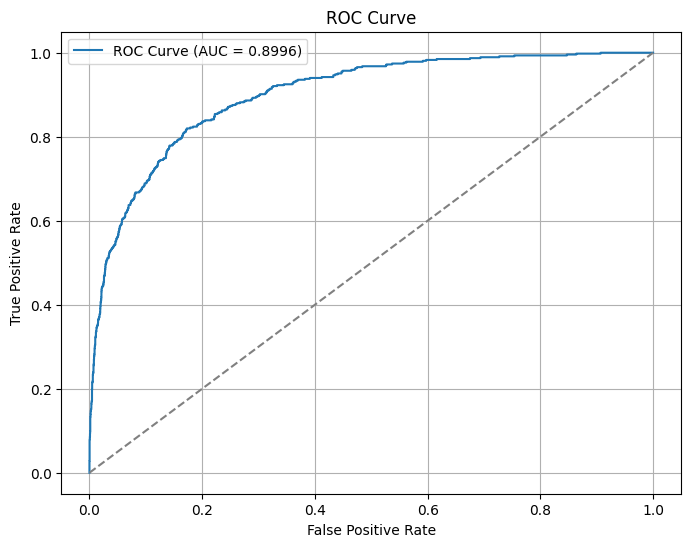

In [23]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(train_data, validation_data, test_data)
best_model = search_best_parameter(X_train, y_train, X_val, y_val)
test_auc, fpr, tpr = testing_data(best_model, X_test, y_test)
print_roc_curve(test_auc, fpr, tpr)

# Data 02

In [24]:
train_data = pd.read_csv('../00-dataset/02-data02/train_data_2.csv')
test_data = pd.read_csv('../00-dataset/02-data02/test_data_2.csv')
validation_data = pd.read_csv('../00-dataset/02-data02/validation_data_2.csv')

print(train_data.describe())
print(test_data.describe())
print(validation_data.describe())

                age           bmi  elective_surgery   ethnicity_0  \
count  27931.000000  27931.000000      27931.000000  27931.000000   
mean      63.630950     28.833105          0.152626      0.049479   
std       15.702669      7.841412          0.359633      0.216870   
min       16.000000     14.844926          0.000000      0.000000   
25%       55.000000     23.717173          0.000000      0.000000   
50%       65.000000     27.662522          0.000000      0.000000   
75%       75.235712     32.049444          0.000000      0.000000   
max       89.000000     67.814990          1.000000      1.000000   

        ethnicity_1   ethnicity_2      gender_0      gender_1        height  \
count  27931.000000  27931.000000  27931.000000  27931.000000  27931.000000   
mean       0.156743      0.922165      0.440514      0.559486    169.484901   
std        0.363565      0.267916      0.496458      0.496458     10.388997   
min        0.000000      0.000000      0.000000      0.000000 

Best Parameters: {'n_estimators': 200, 'max_depth': 20}
Best Validation AUC: 0.9791
Test AUC: 0.9776


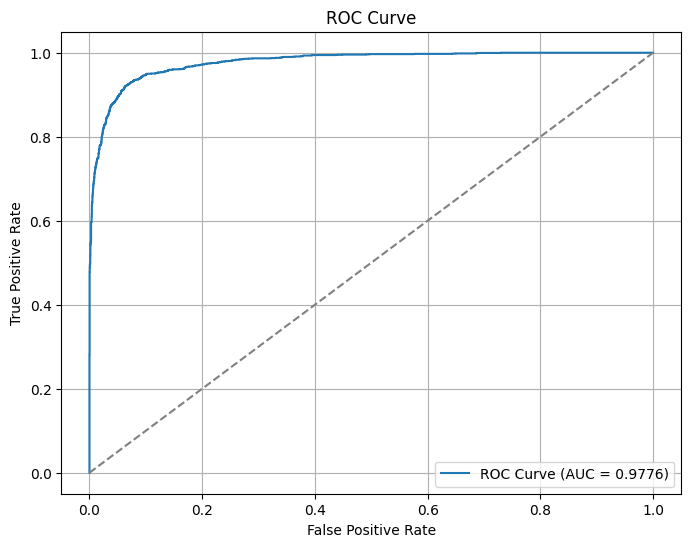

In [25]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(train_data, validation_data, test_data)
best_model = search_best_parameter(X_train, y_train, X_val, y_val)
test_auc, fpr, tpr = testing_data(best_model, X_test, y_test)
print_roc_curve(test_auc, fpr, tpr)

# Data 03

In [26]:
train_data = pd.read_csv('../00-dataset/03-data03/train_data_3.csv')
test_data = pd.read_csv('../00-dataset/03-data03/test_data_3.csv')
validation_data = pd.read_csv('../00-dataset/03-data03/validation_data_3.csv')

print(train_data.describe())
print(test_data.describe())
print(validation_data.describe())

                age           bmi  elective_surgery   ethnicity_0  \
count  39104.000000  39104.000000      39104.000000  39104.000000   
mean      65.245333     28.615652          0.123184      0.036544   
std       14.733992      7.519021          0.328653      0.187641   
min       16.000000     14.844926          0.000000      0.000000   
25%       58.000000     23.715098          0.000000      0.000000   
50%       67.000000     27.475801          0.000000      0.000000   
75%       76.036858     31.761454          0.000000      0.000000   
max       89.000000     67.814990          1.000000      1.000000   

        ethnicity_1   ethnicity_2      gender_0      gender_1        height  \
count  39104.000000  39104.000000  39104.000000  39104.000000  39104.000000   
mean       0.099862      0.940901      0.428729      0.571271    169.465482   
std        0.299820      0.235813      0.494901      0.494901      9.986701   
min        0.000000      0.000000      0.000000      0.000000 

Best Parameters: {'n_estimators': 200, 'max_depth': 20}
Best Validation AUC: 0.9923
Test AUC: 0.9928


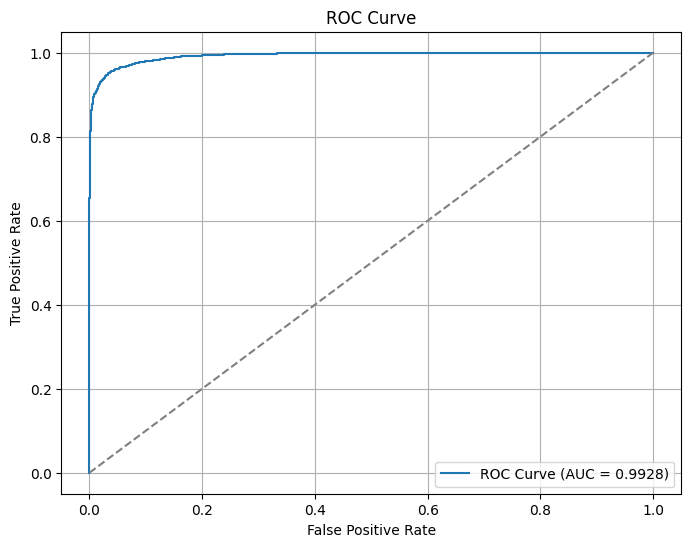

In [27]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(train_data, validation_data, test_data)
best_model = search_best_parameter(X_train, y_train, X_val, y_val)
test_auc, fpr, tpr = testing_data(best_model, X_test, y_test)
print_roc_curve(test_auc, fpr, tpr)